# ML-ZC Homework 1

In [8]:
import pandas as pd
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
laptops_df = pd.read_csv(url)

# Display the first few rows to confirm
laptops_df.head()



,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [10]:
# Update the column names by converting to lowercase and replacing spaces with underscores
laptops_df.columns = laptops_df.columns.str.lower().str.replace(' ', '_')

# Display the updated column names to confirm the changes
laptops_df.columns


Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [11]:
# Select only the specified columns: 'ram', 'storage', 'screen', and 'final_price'
laptops_selected_columns = laptops_df[['ram', 'storage', 'screen', 'final_price']]

# Display the first few rows of the new dataframe to confirm
laptops_selected_columns.head()


,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


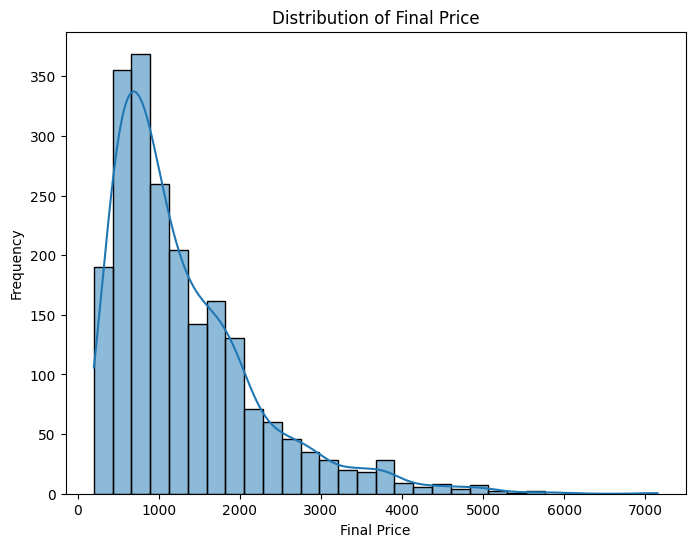

Mean: 1312.638509259259, Median: 1031.9450000000002


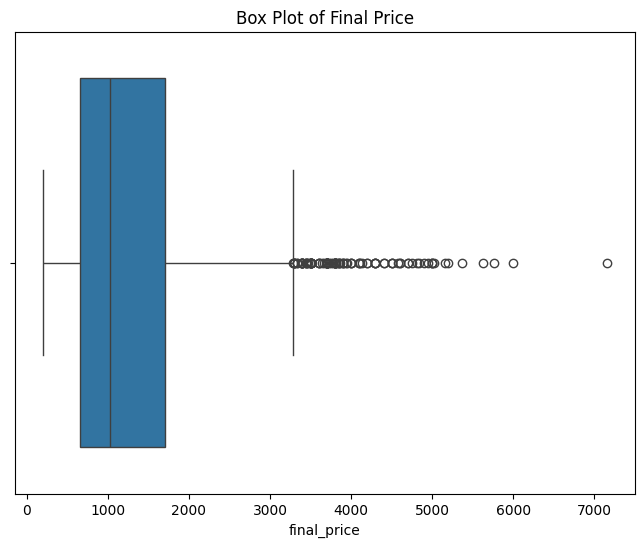

In [13]:
# First, standardize the column names (lowercase and replace spaces with underscores)
laptops_df.columns = laptops_df.columns.str.lower().str.replace(' ', '_')

# Now, try plotting the histogram again with the corrected column name
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'final_price' column
plt.figure(figsize=(8, 6))
sns.histplot(laptops_df['final_price'], bins=30, kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics (mean, median)
mean_price = laptops_df['final_price'].mean()
median_price = laptops_df['final_price'].median()

print(f"Mean: {mean_price}, Median: {median_price}")

# Box plot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=laptops_df['final_price'])
plt.title('Box Plot of Final Price')
plt.show()


# Q1 Missing values

In [14]:
# Check for missing values in each column
missing_values = laptops_df.isnull().sum()

# Display columns that have missing values
print(missing_values[missing_values > 0])


storage_type      42
gpu             1371
screen             4
dtype: int64


# Q2 Median of RAM

In [16]:
# Calculate the median of the 'ram' column (in lowercase)
ram_median = laptops_df['ram'].median()

print(f"The median (50th percentile) for RAM is: {ram_median} GB")


The median (50th percentile) for RAM is: 16.0 GB


In [17]:
# Shuffle the dataset with a random seed of 42
shuffled_laptops_df = laptops_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the shuffled dataframe to confirm
shuffled_laptops_df.head()


,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [18]:
from sklearn.model_selection import train_test_split

# First, split the data into training and temporary sets (60% train, 40% temporary)
train_set, temp_set = train_test_split(laptops_df, test_size=0.4, random_state=42)

# Then, split the temporary set into validation and test sets (50% of 40% each)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Display the sizes of each set
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")


Training set size: 1296
Validation set size: 432
Test set size: 432


# Question 3

In [21]:
# Check the data types of the training dataset
print(train_set.dtypes)

# Select only numeric columns to calculate mean and fill missing values
numeric_columns = train_set.select_dtypes(include=['float64', 'int64']).columns

# Duplicate the training dataset
train_set_mean = train_set.copy()  # For replacing with mean
train_set_zero = train_set.copy()   # For replacing with zero

# Calculate the mean for each numeric column in the training set
mean_values = train_set_mean[numeric_columns].mean()

# Replace missing values in the first dataset with the mean values
train_set_mean[numeric_columns] = train_set_mean[numeric_columns].fillna(mean_values)

# Replace missing values in the second dataset with zero for numeric columns
train_set_zero[numeric_columns] = train_set_zero[numeric_columns].fillna(0)

# Optionally, display the first few rows to confirm changes
print("Train Set with Mean Values:")
print(train_set_mean.head())

print("\nTrain Set with Zero Values:")
print(train_set_zero.head())


laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object
Train Set with Mean Values:
                                                 laptop       status  \
1357  Gigabyte AERO 17 XE5-73PT738HP Intel Core i7-1...          New   
1055  Samsung Chromebook 4 XE310XBA-K01ES Intel Cele...          New   
513   MSI Stealth 14 Studio A13VE-052XES Intel Core ...          New   
81    HP Victus 15-fa0026ns Intel Core i5-12450H/16G...          New   
1803  Asus Rog Zephyrus G15 GA502IV-HN024 AMD Ryzen ...  Refurbished   

         brand       model            cpu  ram  storage storage_type  \
1357  Gigabyte        Aero  Intel Core i7   16     2000          SSD   
1055   Samsung  Chromebook  Intel Celeron    4       32         eMMC   
513        MSI     St

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the features (X) and target (y) for the models
# Assume 'final_price' is the target variable and the rest are features
features = ['ram', 'storage', 'screen']  # Adjust features as needed
target = 'final_price'

# Prepare X and y for the first model (mean values)
X_train_mean = train_set_mean[features]
y_train_mean = train_set_mean[target]
X_test = test_set[features]  # Use the same features for the test set
y_test = test_set[target]

# Train the linear regression model with mean values
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

# Make predictions on the test set
y_pred_mean = model_mean.predict(X_test)

# Calculate RMSE for the model with mean replacement
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))

# Prepare X and y for the second model (zero values)
X_train_zero = train_set_zero[features]
y_train_zero = train_set_zero[target]

# Train the linear regression model with zero values
model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train_zero)

# Make predictions on the test set
y_pred_zero = model_zero.predict(X_test)

# Calculate RMSE for the model with zero replacement
rmse_zero = np.sqrt(mean_squared_error(y_test, y_pred_zero))

# Display the RMSE results
print(f"RMSE for the model with mean replacement: {rmse_mean}")
print(f"RMSE for the model with zero replacement: {rmse_zero}")


RMSE for the model with mean replacement: 684.07248803113
RMSE for the model with zero replacement: 684.089743558418


# Question 4

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the features (X) and target (y) for the model with zero replacements
X_train_zero = train_set_zero[features]
y_train_zero = train_set_zero[target]

# Define the regularization strengths
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Store RMSE values for each r
rmse_results = []

# Train and evaluate Ridge regression for each r value
for r in r_values:
    # Create and train the model
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train_zero, y_train_zero)
    
    # Make predictions on the test set
    y_pred_zero = model_ridge.predict(X_test)
    
    # Calculate RMSE and round to two decimals
    rmse_zero = np.sqrt(mean_squared_error(y_test, y_pred_zero))
    rmse_results.append(round(rmse_zero, 2))

# Display the RMSE results for each r
for r, rmse in zip(r_values, rmse_results):
    print(f"RMSE for r={r}: {rmse}")


RMSE for r=0: 684.09
RMSE for r=0.01: 684.09
RMSE for r=0.1: 684.09
RMSE for r=1: 684.09
RMSE for r=5: 684.08
RMSE for r=10: 684.07
RMSE for r=100: 683.94


# Question 5

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize an empty list to collect RMSE scores
rmse_scores = []

# Define the seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Prepare the features (X) and target (y) for the model
features = ['ram', 'storage', 'screen']  # Adjust this based on your dataset
target = 'final_price'

# Loop over each seed
for seed in seeds:
    # Split the dataset into train and test (60% train, 40% test)
    train_temp_set, test_set = train_test_split(laptops_df, test_size=0.4, random_state=seed)
    
    # Split the train_temp_set into train and validation (60% train, 40% temp = 20% val, 20% test)
    train_set, val_set = train_test_split(train_temp_set, test_size=0.4, random_state=seed)
    
    # Replace missing values with 0 in the training set
    train_set.fillna(0, inplace=True)
    
    # Replace missing values with 0 in the validation set to prevent NaN in features
    val_set.fillna(0, inplace=True)
    
    # Prepare features and target for training and validation
    X_train = train_set[features]
    y_train = train_set[target]
    X_val = val_set[features]
    y_val = val_set[target]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val)

    # Calculate RMSE for the validation set
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    
    # Append the RMSE score to the list
    rmse_scores.append(rmse_val)

# Calculate the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

# Round the standard deviation to 3 decimal places
std_rmse_rounded = round(std_rmse, 3)

# Display the standard deviation of RMSE scores
print(f"Standard deviation of RMSE scores: {std_rmse_rounded}")


Standard deviation of RMSE scores: 25.473


# Question 6

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Prepare the features (X) and target (y) for the model
features = ['ram', 'storage', 'screen']  # Adjust this based on your dataset
target = 'final_price'

# Split the dataset into train and test (60% train, 40% test) using seed 9
train_temp_set, test_set = train_test_split(laptops_df, test_size=0.4, random_state=9)

# Split the train_temp_set into train and validation (60% train, 40% temp = 20% val)
train_set, val_set = train_test_split(train_temp_set, test_size=0.4, random_state=9)

# Combine train and validation datasets
combined_train_set = pd.concat([train_set, val_set])

# Replace missing values with 0 in the combined dataset
combined_train_set.fillna(0, inplace=True)

# Prepare features and target for training
X_train = combined_train_set[features]
y_train = combined_train_set[target]

# Prepare features for the test set (replace missing values with 0)
test_set.fillna(0, inplace=True)
X_test = test_set[features]
y_test = test_set[target]

# Train a Ridge regression model with r = 0.001
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display the RMSE for the test dataset
print(f"RMSE on the test dataset: {rmse_test:.3f}")


RMSE on the test dataset: 612.863
